In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
from os import system
res = []
for nbThreads in range(1,9):
    for nbIndis in [32,64,128]:
        # !OMP_NUM_THREADS={nbThread} ./micro_aevol_cpu -w {nbIndis} -h {nbIndis} > /dev/null
        cmd = 'OMP_NUM_THREADS={nbThreads} ./micro_aevol_cpu -w {nbIndis} -h {nbIndis}'.format(nbThreads=nbThreads, nbIndis=nbIndis)
        system(cmd)
        d = pd.read_csv('trace.csv')
        d = d[1:]
        dur_per_gen = d['Duration']
        sum = dur_per_gen.sum()
        res.append([sum, nbThreads, nbIndis])
        print(nbThreads, sum)

1 8459619500
1 33886453500
1 117363664400
2 5778265200
2 20541314900
2 68453168000
3 7099514100
3 18345070000
3 54787937500
4 9559378900
4 24913479400
4 65266114400
5 8840754600
5 21160494600
5 63860082900
6 6122375200
6 18528210800
6 60603339900
7 6381054800
7 19521636300
7 71879980400
8 6474910000
8 20262106100
8 66968148100


In [3]:
res = pd.read_csv('proportional.csv')

In [4]:
res

,Unnamed: 0,duration,nbThreads,nbIndis
0,0,5395773900,1,750
1,1,5463401900,2,1500
2,2,8367855300,3,2250
3,3,15876415000,4,3000
4,4,12566178600,5,3750
5,5,15597796100,6,4500
6,6,20990054200,7,5250
7,7,23127326900,8,6000


<AxesSubplot:xlabel='nbIndis'>

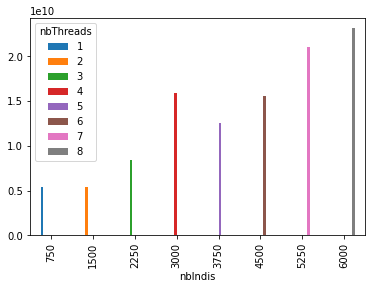

In [7]:
res.pivot(index='nbIndis', columns='nbThreads', values='duration').plot(kind='bar')